# Road Traffic Analysis for Accident Prevention

A project aimed at leveraging data analysis techniques to study road traffic patterns with the goal of preventing accidents. This involves collecting and analyzing data related to various factors such as weather conditions, road types, traffic volume, and historical accident records. By identifying patterns and correlations within the data, the project aims to develop insights and models that can help in implementing preventive measures and improving road safety.
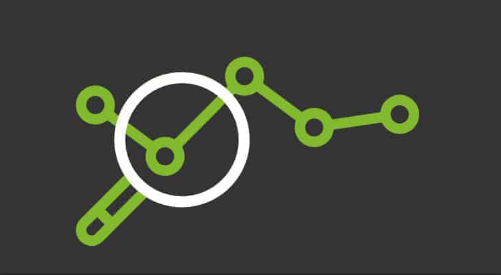

# 1. Preparing the environment

To get started: Import the libraries into your program:

In [1]:
#Import LinearRegression model from scikit-learn for linear regression analysis
from sklearn.linear_model import LinearRegression

#Import mean_squared_error, mean_absolute_error functions from scikit-learn metrics module for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Import train_test_split function from scikit-learn for splitting data into train and test sets
from sklearn.model_selection import train_test_split

# Import Pandas library for data manipulation
import pandas as pd

# Import NumPy library for numerical computations
import numpy as np

# Import SparkSession from PySpark SQL module for Spark DataFrame operations
from pyspark.sql import SparkSession

# Import col function from PySpark SQL functions module for column operations
from pyspark.sql.functions import col

# Import VectorAssembler from PySpark ML feature module for vectorizing features
from pyspark.ml.feature import VectorAssembler

# Import Seaborn library for statistical data visualization
import seaborn as sns

# Import when function from PySpark SQL functions module for conditional operations
from pyspark.sql.functions import when

# Import IntegerType from PySpark SQL types module for integer data type operations
from pyspark.sql.types import IntegerType

# Import Matplotlib library for data visualization
import matplotlib.pyplot as plt

# Import LinearRegression from PySpark ML regression module for linear regression analysis
from pyspark.ml.regression import LinearRegression



## Set up Spark

Spark is an open-source distributed computing system designed for big data processing and analytics. It provides an interface for programming entire clusters with implicit data parallelism and fault tolerance. Spark's core abstraction is the Resilient Distributed Dataset (RDD), which represents a distributed collection of data that can be operated on in parallel
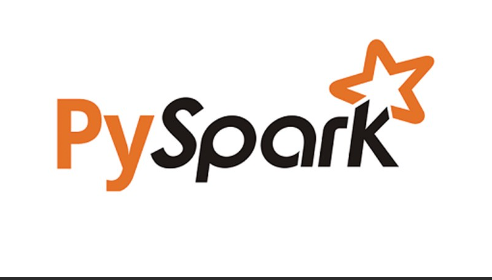

In [2]:
# Initialize SparkSession
spark = SparkSession.builder.appName("RoadTrafficAnalysis").getOrCreate()

# Check SparkSession
spark

# 2. Data Collection:

In [3]:
# Load the dataset into a Spark DataFrame
df = spark.read.csv("C:/Users/HP/Downloads/Traffic Accidents in Pakistan.csv", 
                    header=True, 
                    inferSchema=True)
df.show()


+------------+------------------------+--------------+------------------+-------------+--------------+---------------------------------+
|Month - Year|Total Number of Accident|Accident Fatal|Accident Non-Fatal|Person Killed|Person Injured|Total Number of vehicles Involves|
+------------+------------------------+--------------+------------------+-------------+--------------+---------------------------------+
|    Pakistan|                    NULL|          NULL|              NULL|         NULL|          NULL|                             NULL|
|   2012-2013|                    8988|          3884|              5104|         4719|          9710|                             9876|
|   2013-2014|                    8359|          3500|              4859|         4348|          9777|                             9423|
|   2014-2015|                    7865|          3214|              4651|         3954|          9661|                             8949|
|   2015-2016|                    9100|  

# 3. Data Cleaning and Preprocessing:

## Checking and handling missing data:

In [4]:
# Check for missing values in the entire DataFrame
#df_missing = df.select([col(c).isNull().alias(c) for c in df.columns]).show()

#df_missing
# # Check for missing values in a specific column
# df.select("your_column_name").isNull().sum().show()

# # Fill missing values with a specific value
# df = df.fillna({"your_column_name": "replacement_value"})

# Drop rows with missing values
df = df.dropna()
df.show()


+------------+------------------------+--------------+------------------+-------------+--------------+---------------------------------+
|Month - Year|Total Number of Accident|Accident Fatal|Accident Non-Fatal|Person Killed|Person Injured|Total Number of vehicles Involves|
+------------+------------------------+--------------+------------------+-------------+--------------+---------------------------------+
|   2012-2013|                    8988|          3884|              5104|         4719|          9710|                             9876|
|   2013-2014|                    8359|          3500|              4859|         4348|          9777|                             9423|
|   2014-2015|                    7865|          3214|              4651|         3954|          9661|                             8949|
|   2015-2016|                    9100|          3591|              5509|         4448|         11544|                            10636|
|   2016-2017|                    9582|  

## Checking data types and making necessary conversions

In [5]:
# Assuming 'df' is your DataFrame
print(df.dtypes)


[('Month - Year', 'string'), ('Total Number of Accident', 'int'), ('Accident Fatal', 'int'), ('Accident Non-Fatal', 'int'), ('Person Killed', 'int'), ('Person Injured', 'int'), ('Total Number of vehicles Involves', 'int')]


## Identifying and handling outliers

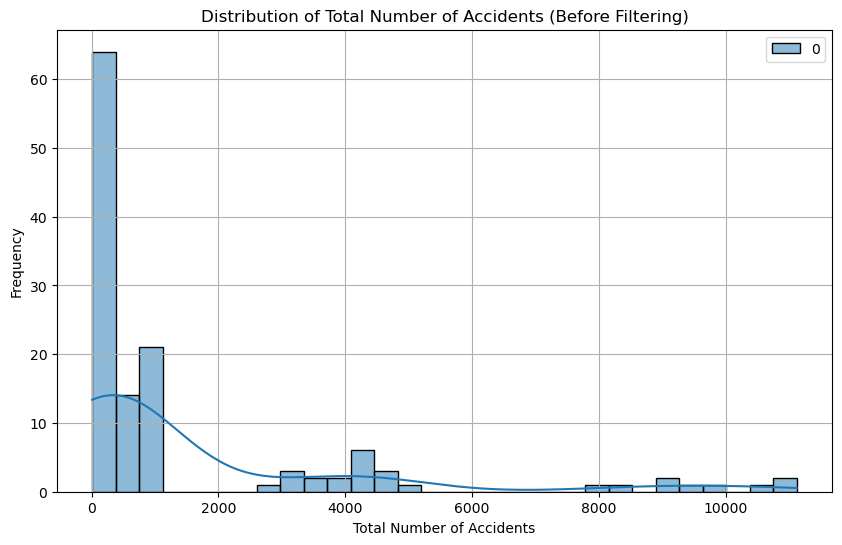

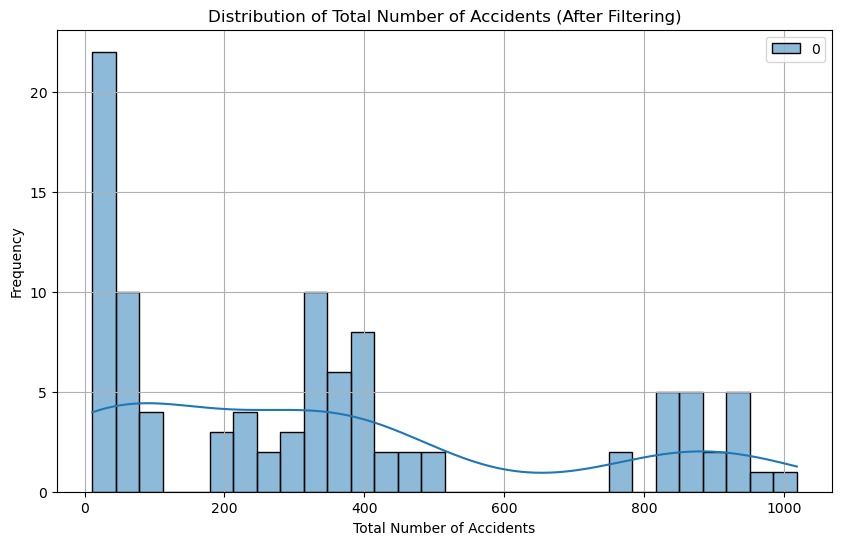

Filtered DataFrame:
+------------+------------------------+--------------+------------------+-------------+--------------+---------------------------------+
|Month - Year|Total Number of Accident|Accident Fatal|Accident Non-Fatal|Person Killed|Person Injured|Total Number of vehicles Involves|
+------------+------------------------+--------------+------------------+-------------+--------------+---------------------------------+
|    2021-Jan|                     769|           370|               399|          458|           903|                             1090|
|    2021-Feb|                     823|           381|               442|          486|          1080|                             1194|
|    2021-Mar|                     819|           400|               419|          482|          1104|                             1293|
|    2021-Apr|                     781|           383|               398|          461|           837|                             1151|
|    2021-May|       

In [6]:
# Calculate Q1, Q3, and IQR
quantiles = df.approxQuantile('Total Number of Accident', [0.25, 0.75], 0.01)
Q1 = quantiles[0]
Q3 = quantiles[1]
IQR = Q3 - Q1

# Apply the filter
filtered_df = df.filter(col('Total Number of Accident').between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR))

# Extract values from the DataFrame column as a NumPy array
total_accidents_values = np.array(df.select('Total Number of Accident').collect())
total_accident_filtre = np.array(filtered_df.select('Total Number of Accident').collect())


# Plot the distribution before filtering
plt.figure(figsize=(10, 6))
sns.histplot(total_accidents_values, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Number of Accidents (Before Filtering)')
plt.xlabel('Total Number of Accidents')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the distribution after filtering
plt.figure(figsize=(10, 6))
sns.histplot(total_accident_filtre, bins=30, kde=True, color='lightgreen', edgecolor='black')
plt.title('Distribution of Total Number of Accidents (After Filtering)')
plt.xlabel('Total Number of Accidents')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Show the filtered DataFrame
print("Filtered DataFrame:")
filtered_df.show()


# 3. Exploratory Data Analysis (EDA)

The process of examining and understanding a dataset to uncover its underlying structure, patterns, and relationships. 

It involves summarizing the main characteristics of the data, visualizing its distributions and relationships, and identifying any anomalies or interesting features. EDA helps in formulating hypotheses, guiding feature engineering, and informing subsequent modeling decisions. It is an essential step in the data analysis workflow that provides valuable insights into the dataset and lays the groundwork for further analysis and modeling.

## Analyzing the distribution of features in the dataset

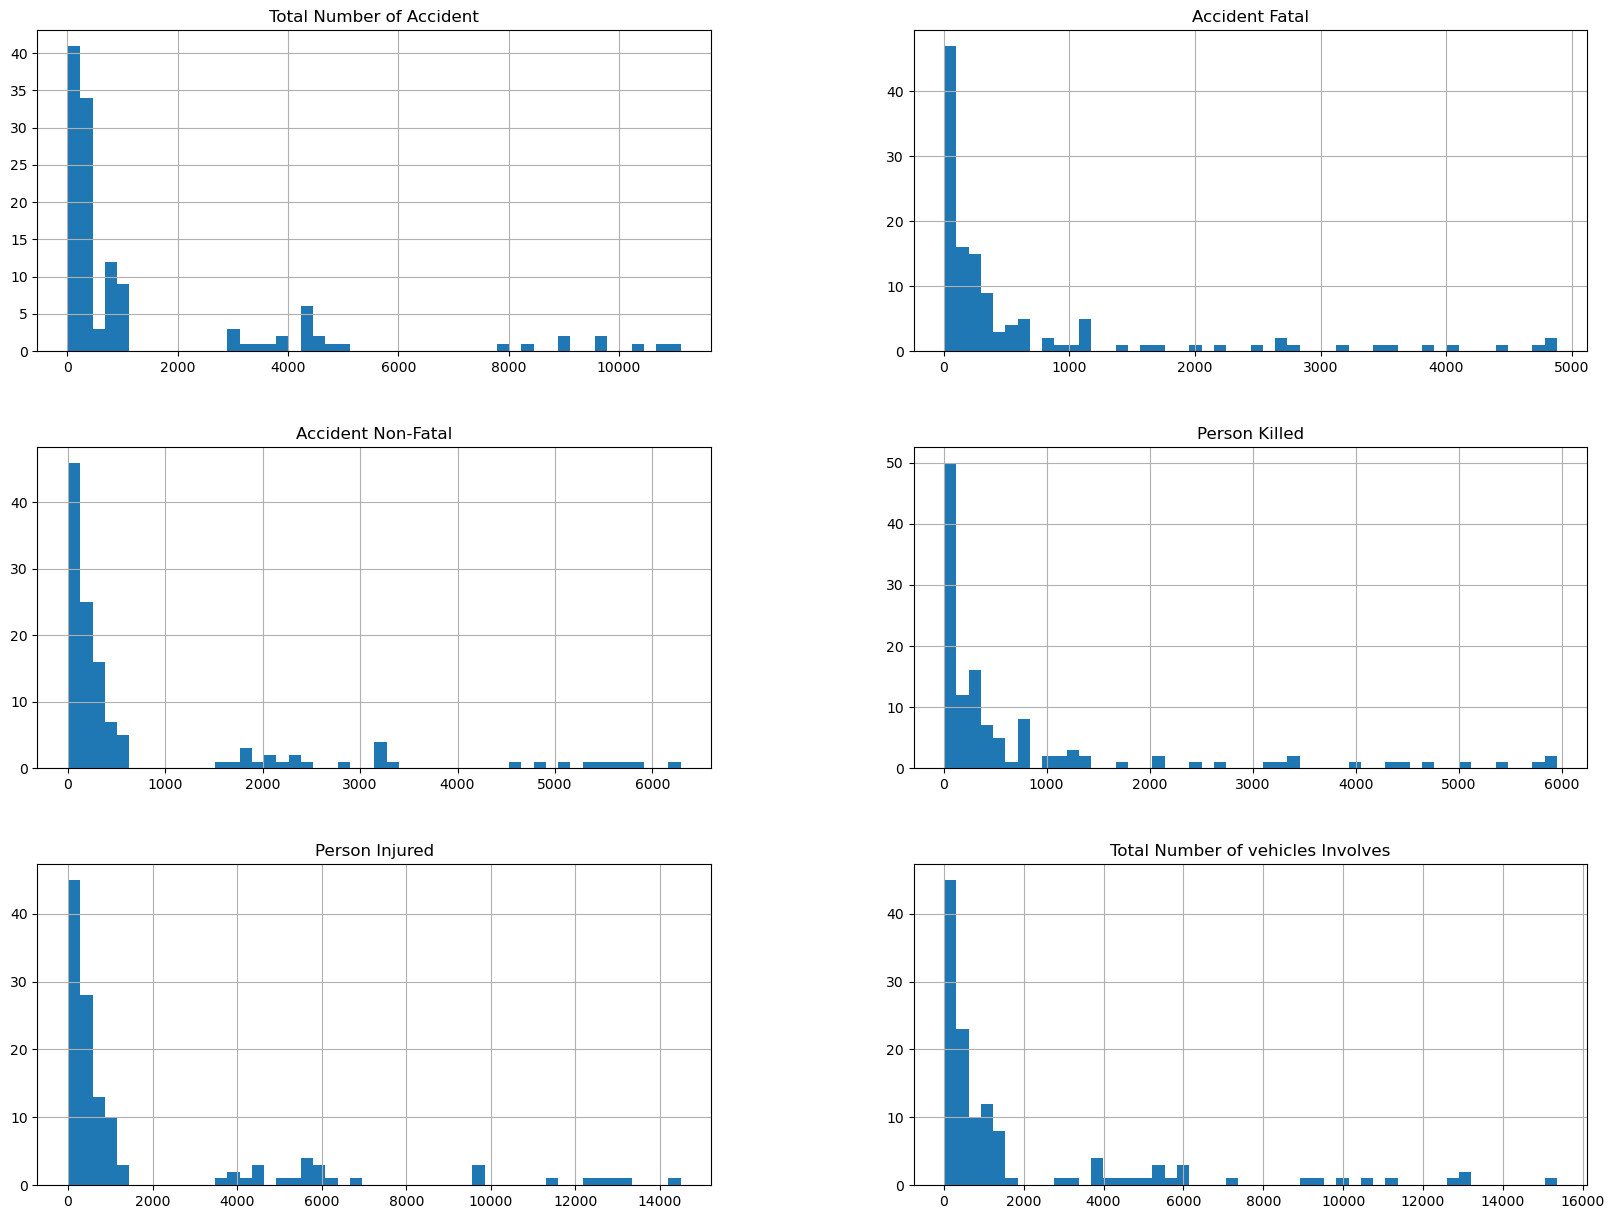

In [7]:
# Convert Spark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()

# Plot histograms for all numeric columns
pandas_df.hist(bins=50, figsize=(20, 15))
plt.show()

## Investigating the fatal and non-fatal nature of accidents

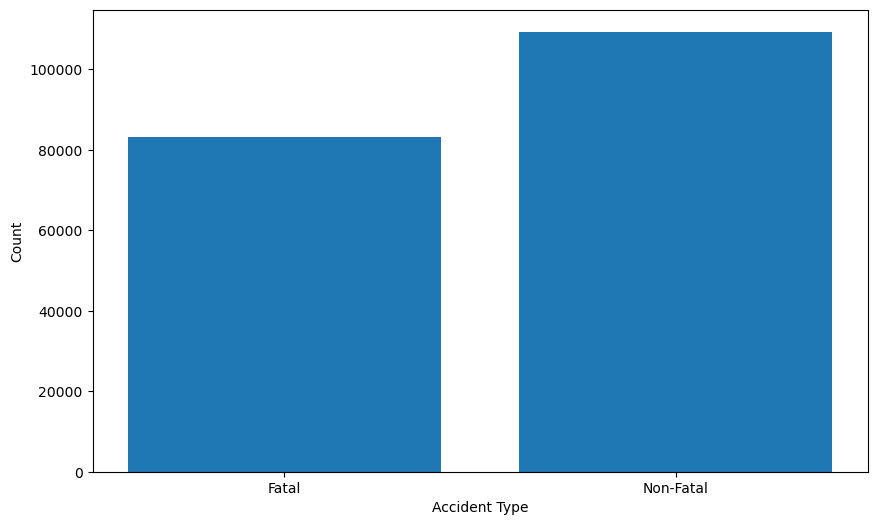

In [8]:

# Compute the counts for 'Accident Fatal' and 'Accident Non-Fatal'
counts = df.groupBy().agg({"Accident Fatal": "sum", "Accident Non-Fatal": "sum"}).collect()[0]

# Plotting the count of fatal and non-fatal accidents
plt.figure(figsize=(10, 6))
plt.bar(['Fatal', 'Non-Fatal'], [counts["sum(Accident Fatal)"], counts["sum(Accident Non-Fatal)"]])
plt.xlabel('Accident Type')
plt.ylabel('Count')
plt.show()


## Investigating the effect of the number of vehicles involved in the severity of accidents

root
 |-- Month - Year: string (nullable = true)
 |-- Total Number of Accident: integer (nullable = true)
 |-- Accident Fatal: integer (nullable = true)
 |-- Accident Non-Fatal: integer (nullable = true)
 |-- Person Killed: integer (nullable = true)
 |-- Person Injured: integer (nullable = true)
 |-- Total Number of vehicles Involves: integer (nullable = true)



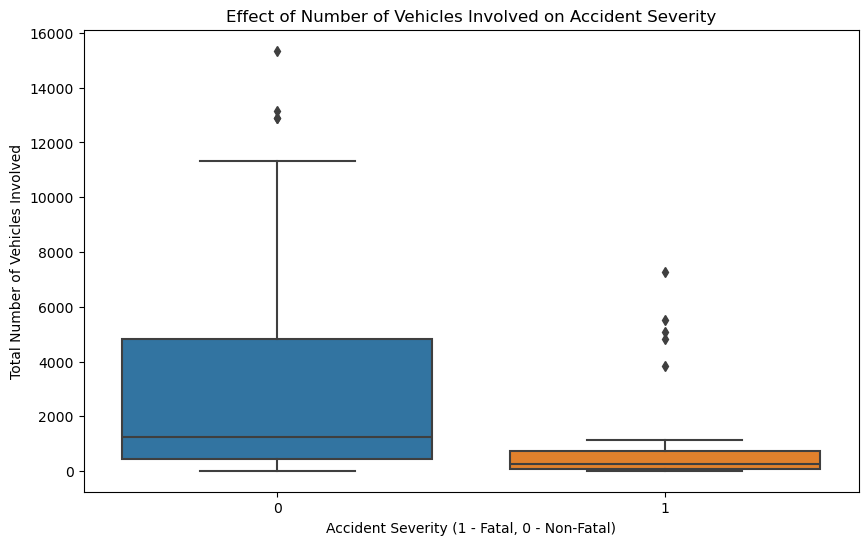

In [9]:
# Check the column names in the DataFrame after replacement
df.printSchema()

# Replace spaces or non-alphanumeric characters in column names with underscores
columns_with_underscores = [col(c).alias(c.replace(' ', '_').replace('.', '_')) for c in df.columns]
df = df.select(*columns_with_underscores)

# Create a new column 'Accident_Severity' based on the condition
df = df.withColumn('Accident_Severity', when(df['Accident_Fatal'] > df['Accident_Non-Fatal'], 1).otherwise(0).cast(IntegerType()))

# Plotting the relationship between the number of vehicles involved and accident severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Accident_Severity', y='Total_Number_of_vehicles_Involves', data=df.toPandas())
plt.xlabel('Accident Severity (1 - Fatal, 0 - Non-Fatal)')
plt.ylabel('Total Number of Vehicles Involved')
plt.title('Effect of Number of Vehicles Involved on Accident Severity')
plt.show()


# 4. Estimate of Deaths and Injury

## Selecting relevant columns and renaming them if necessary

In [10]:
# Selecting relevant columns and renaming them if necessary
df = df.selectExpr("Person_Killed as Person_Killed", "Person_Injured as Person_Injured")

# Drop any existing column named "input_features"
if "input_features" in df.columns:
    df = df.drop("input_features")

## Combining features into a single feature vector column

In [11]:
assembler = VectorAssembler(inputCols=["Person_Killed", "Person_Injured"], outputCol="input_features")
df_assembled = assembler.transform(df)

## Split the data

In [12]:
# Split the data into training and testing sets
train_data, test_data = df_assembled.randomSplit([0.8, 0.2], seed=42)

## Linear Regression for Predicting Number of Persons Killed in Traffic Accidents

In [13]:
# Creating Linear Regression model
lr = LinearRegression(labelCol='Person_Killed', featuresCol='input_features')

# Training the model
model = lr.fit(train_data)

# Making predictions on the test set
predictions = model.transform(test_data)

# Displaying the predictions
predictions.select("Person_Killed", "prediction", "input_features").show()

# Stop the Spark session
#spark.stop()


+-------------+------------------+---------------+
|Person_Killed|        prediction| input_features|
+-------------+------------------+---------------+
|            7| 7.000000000000129|      [7.0,5.0]|
|           11|11.000000000000112|     [11.0,4.0]|
|           13|13.000000000000105|     [13.0,4.0]|
|           20|20.000000000000153|    [20.0,56.0]|
|           30| 30.00000000000007|    [30.0,25.0]|
|           34| 34.00000000000007|    [34.0,36.0]|
|           56| 56.00000000000002|    [56.0,52.0]|
|           74| 74.00000000000003|   [74.0,105.0]|
|          109|109.00000000000065|  [109.0,621.0]|
|          112|112.00000000000031|  [112.0,399.0]|
|          118| 117.9999999999999|  [118.0,121.0]|
|          120|120.00000000000041|  [120.0,486.0]|
|          131|131.00000000000057|  [131.0,617.0]|
|          141| 140.9999999999998|  [141.0,123.0]|
|          244|243.99999999999994|  [244.0,471.0]|
|          288|287.99999999999983|  [288.0,498.0]|
|          346|345.999999999999

## Evaluate the model performance

In [14]:
from pyspark.ml.evaluation import RegressionEvaluator

# Define the evaluator
evaluator = RegressionEvaluator(labelCol="Person_Killed", predictionCol="prediction", metricName="rmse")

# Calculate RMSE
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

# Calculate MAE
mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
print("Mean Absolute Error (MAE) on test data = %g" % mae)

# Calculate MSE
mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
print("Mean Squared Error (MSE) on test data = %g" % mse)


Root Mean Squared Error (RMSE) on test data = 1.2924e-12
Mean Absolute Error (MAE) on test data = 6.83776e-13
Mean Squared Error (MSE) on test data = 1.6703e-24


## Accident Severity Classification

In [15]:
from pyspark.ml.evaluation import RegressionEvaluator

# Evaluate the model using RegressionEvaluator
evaluator = RegressionEvaluator(labelCol='Person_Killed', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE):", rmse)


+-------------+------------------+---------------+
|Person_Killed|        prediction| input_features|
+-------------+------------------+---------------+
|            7| 7.000000000000129|      [7.0,5.0]|
|           11|11.000000000000112|     [11.0,4.0]|
|           13|13.000000000000105|     [13.0,4.0]|
|           20|20.000000000000153|    [20.0,56.0]|
|           30| 30.00000000000007|    [30.0,25.0]|
|           34| 34.00000000000007|    [34.0,36.0]|
|           56| 56.00000000000002|    [56.0,52.0]|
|           74| 74.00000000000003|   [74.0,105.0]|
|          109|109.00000000000065|  [109.0,621.0]|
|          112|112.00000000000031|  [112.0,399.0]|
|          118| 117.9999999999999|  [118.0,121.0]|
|          120|120.00000000000041|  [120.0,486.0]|
|          131|131.00000000000057|  [131.0,617.0]|
|          141| 140.9999999999998|  [141.0,123.0]|
|          244|243.99999999999994|  [244.0,471.0]|
|          288|287.99999999999983|  [288.0,498.0]|
|          346|345.999999999999

## Visualize the predictions and actual values

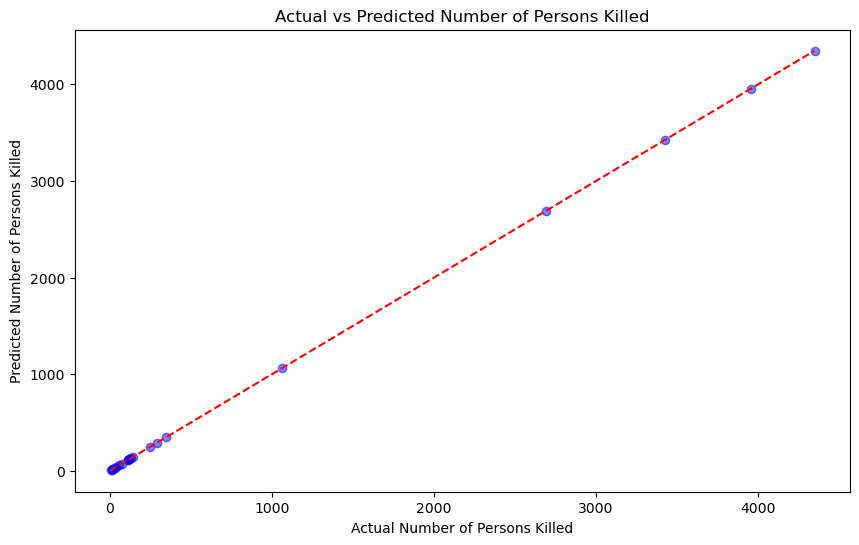

In [88]:
import matplotlib.pyplot as plt

# Extract actual and predicted values
actual_values = [row.Person_Killed for row in predictions.collect()]
predicted_values = [row.prediction for row in predictions.collect()]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, color='blue', alpha=0.5)

# Plot the diagonal line for reference
max_value = max(max(actual_values), max(predicted_values))
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--')

# Add labels and title
plt.title('Actual vs Predicted Number of Persons Killed')
plt.xlabel('Actual Number of Persons Killed')
plt.ylabel('Predicted Number of Persons Killed')

# Show plot
plt.show()


The scatter plot visually compares the actual and predicted number of persons killed in accidents. By observing the alignment of the points with the diagonal line, we can assess the accuracy of the regression model. If the points are closer to the diagonal line, it indicates that the model's predictions are closer to the actual values, suggesting a better model performance. Conversely, if the points deviate significantly from the diagonal line, it indicates potential inaccuracies in the predictions. Further analysis and refinement of the model may be required to improve its predictive accuracy.

# 5. Future Work

For future work, it would be beneficial to further investigate additional factors that contribute to accidents, such as weather conditions, road types, and driver demographics. Additionally, applying more advanced modeling techniques and exploring other datasets related to road safety could provide further insights and improve prediction accuracy.